Use case
=========
You were recently hired in start up company and you were asked to build a system to identify spam emails.

Perform all necessary actions not only limited to,

1. Data Preparation
2. Building word dictionary
3. Feature extraction
4. Training classifiers
5. Testing 
6. Performance evaluation using multiple metrics (Confusion matrix, f1 score, roc, auc)

In [1]:
## import the basic library
import pandas as pd 
import numpy as np
import seaborn as sns
import os
import string



In [2]:
## lode the dataset 

df_mail =  pd.read_csv(r"F:\desktop 123\INTERSHIP-DS\messages.csv")
df_mail.head()



,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [3]:
## let's check the basic detailes 

df_mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [4]:
df_mail.describe(include=['O'])

,subject,message
count,2831,2893
unique,2613,2859
top,sociolinguistics,this is not spam ; you are receiving this mess...
freq,8,5


In [5]:
# check the missing values in the dataset 
df_mail.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [6]:
# lets find out the percentage of misssing vale in each column
Percent_Missing_Value = df_mail.isnull().sum()*100/len(df_mail)
Percent_Missing_Value

subject    2.143104
message    0.000000
label      0.000000
dtype: float64

In [7]:
## Total no of samples where any column has NaN
df_mail[(df_mail["subject"].isnull()==True)|
           (df_mail["message"].isnull()==True)|
           (df_mail["label"].isnull()==True)]

,subject,message,label
1,NaN,"lang classification grimes , joseph e . and ba...",0
13,NaN,syntax the antisymmetry of syntax richard s . ...,0
69,NaN,computational ling bengt sigurd ( ed ) compute...,0
107,NaN,"phonology & phonetics burquest , donald a . an...",0
258,NaN,phonology & phonetics leiden in last : hil pho...,0
...,...,...,...
2296,NaN,the latest issue ( 1994 n01 ) of etudes de let...,0
2309,NaN,b a r g a i n a i r f a r e s your 1 - stop tr...,1
2555,NaN,"data to : = 20 date : fri , 06 feb 1998 22 : 3...",1
2562,NaN,"epac . pt , e . carnoali @ genie . com , e . c...",1


In [8]:
 ## let's drop the missing value in the data set 
print(df_mail.shape)

## Lets delete all the Rows where we have NaN values
df_mail_new = df_mail.dropna()

print(df_mail_new.shape)

(2893, 3)
(2831, 3)


In [9]:
# let's check the missing value now 


df_mail_new.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [10]:
#let's check the duplicte in dataset 
df_mail_new.duplicated().sum()

17

In [11]:
# as we see there 17 duplicate present in the dataset 
df_mail_new.drop_duplicates(inplace = True)

<ipython-input-11-d6febe14d26b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mail_new.drop_duplicates(inplace = True)


In [12]:
df_mail_new.describe(include=['O'])

,subject,message
count,2814,2814
unique,2613,2797
top,sociolinguistics,university degree programs increase your perso...
freq,8,3


In [13]:
df_mail_new.groupby("label").describe().T

label                                                           0  \
subject count                                                2359   
        unique                                               2193   
        top                                      sociolinguistics   
        freq                                                    8   
message count                                                2359   
        unique                                               2352   
        top     second workshop on interlinguas : call for pap...   
        freq                                                    2   

label                                                           1  
subject count                                                 455  
        unique                                                420  
        top                                new on capitalfm . com  
        freq                                                    5  
message count                                                 455  
        unique                                                445  
        top     university degree programs increase your perso...  
        freq                                                    3

In [14]:
df_mail_new["label"].value_counts()

0    2359
1     455
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

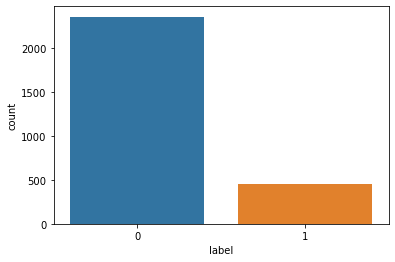

In [15]:
sns.countplot(x="label",data=df_mail_new)

In [16]:
## create a new column (length of message )
df_mail_new["length of subject"] =df_mail_new["subject"].apply(len)
df_mail_new["length of message"] =df_mail_new["message"].apply(len)
df_mail_new.head()

<ipython-input-16-7ef22b312110>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mail_new["length of subject"] =df_mail_new["subject"].apply(len)
<ipython-input-16-7ef22b312110>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mail_new["length of message"] =df_mail_new["message"].apply(len)


,subject,message,label,length of subject,length of message
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,39,2856
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,50,1435
3,risk,a colleague and i are researching the differin...,0,4,324
4,request book information,earlier this morning i was on the phone with a...,0,24,1046
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,51,4492


In [17]:
## let's check the maximum message 

df_mail_new.nlargest(1,"length of message")

,subject,message,label,length of subject,length of message
1185,sampson : educating eve,"g . sampson , ( 1997 ) educating eve : the lan...",0,23,28649


In [18]:
# lest check the maximum lenght of the message 
df_mail_new["length of message"].max()

28649

In [19]:
## check that message :-----

df_mail_new[df_mail_new["length of message"]==df_mail_new["length of message"].max()]["message"].iloc[0]

'g . sampson , ( 1997 ) educating eve : the language instinct debate , cassell , london , 184pp . reviewed by feargal murphy , university college dublin . the rise of generative linguistics in 60s gave a new lease of life to the old nature vs . nurture debate . the behaviourist model of language was judged a failure at explaining the process of language acquisition and a new theory of language acquisition emerged . it was rooted in the philosophy of descartes in the 17th century as well as humboldt and , ultimately , plato . it came to be known as linguistic nativism or rationalist linguistics and is most associated with noam chomsky . the central tenet of this theory is that children are born with some kind of language acquisition device already in place in their brains which allows them to acquire the language of their environment . within linguistic nativism there has been some debate as to whether this device provides merely general rules that allow for the acquisition of language 

limit_output extension: Maximum message size of 10000 exceeded with 28739 characters

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

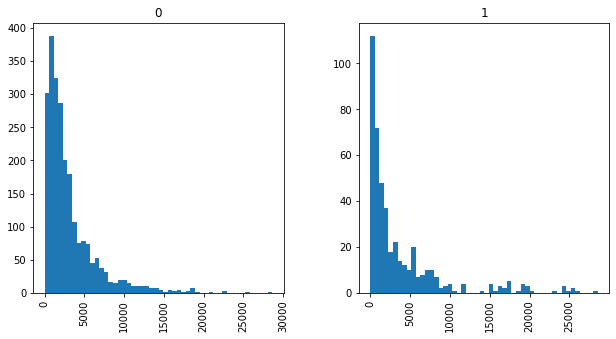

In [20]:
# check the relation b/w message lenght  and "label"
df_mail_new.hist(column="length of message",by="label",bins=50,figsize=(10,5))

# Text Transformation:

Data Cleaning (Removing unimportant data / Stopwords/stemming )

In [21]:
import string
import nltk

from nltk.corpus import stopwords
nltk.download("stopwords")
stop = stopwords.words("english")

from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
ss = SnowballStemmer("english")
ps = PorterStemmer()

#from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

from sklearn.metrics import accuracy_score,fbeta_score,classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
def clean_text(text):
    nopunc=[txt for txt in text if text not in string.punctuation]
    nopunc=''.join(nopunc)
    
    clean_words=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    #clean_words=''.join(clean_words)
    
    return clean_words

In [23]:

def join_func(text1,text2):
    text=text1.strip()+' '+text2.strip()
    
    return text

In [24]:
df_mail_new['subject message']=df_mail_new.apply(lambda x:join_func(x['subject'],x['message']),axis=1).reset_index().drop('index',axis=1)

<ipython-input-24-51ed8b3cef63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mail_new['subject message']=df_mail_new.apply(lambda x:join_func(x['subject'],x['message']),axis=1).reset_index().drop('index',axis=1)


In [25]:
df_mail_new.isna().sum()

subject               0
message               0
label                 0
length of subject     0
length of message     0
subject message      79
dtype: int64

In [26]:
df_mail_final = df_mail_new.dropna(axis=0)

In [27]:
df_mail_final.head()

,subject,message,label,length of subject,length of message,subject message
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,39,2856,job posting - apple-iss research center conten...
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,50,1435,risk a colleague and i are researching the dif...
3,risk,a colleague and i are researching the differin...,0,4,324,request book information earlier this morning ...
4,request book information,earlier this morning i was on the phone with a...,0,24,1046,call for abstracts : optimality in syntactic t...
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,51,4492,m . a . in scandinavian linguistics m . a . in...


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
message_bow=CountVectorizer(analyzer=clean_text).fit_transform(df_mail_final['subject message'])

In [30]:
message_bow.shape

(2735, 63393)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(message_bow, df_mail_final['label'], test_size=0.25, random_state=42,)

In [33]:
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [34]:
predict=model.predict(X_test)

In [35]:

print(confusion_matrix(predict,y_test))
print()
print(classification_report(predict,y_test))


[[530 108]
 [ 40   6]]

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       638
           1       0.05      0.13      0.07        46

    accuracy                           0.78       684
   macro avg       0.49      0.48      0.48       684
weighted avg       0.87      0.78      0.82       684



In [36]:

model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [37]:

predict=model.predict(X_test)

In [38]:
print(confusion_matrix(predict,y_test))
print()
print(classification_report(predict,y_test))

[[562 113]
 [  8   1]]

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       675
           1       0.01      0.11      0.02         9

    accuracy                           0.82       684
   macro avg       0.50      0.47      0.46       684
weighted avg       0.97      0.82      0.89       684



In [39]:

g_params={'n_estimators':[100,150,200,250,300]}
gscv=GridSearchCV(RandomForestClassifier(),g_params)


In [40]:

gscv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 150, 200, 250, 300]})

In [41]:
gscv.best_params_

{'n_estimators': 150}